In [4]:
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon

code_iris = pd.read_csv(r"/Users/antoineclaverie-rospide/Downloads/reference_IRIS_geo2021.csv")
print(code_iris)


       CODE_IRIS                                      LIB_IRIS TYP_IRIS  \
0      010010000  L'Abergement-Clémenciat (commune non irisée)        Z   
1      010020000    L'Abergement-de-Varey (commune non irisée)        Z   
2      010040101             Les Pérouses-Triangle d'Activités        H   
3      010040102                                 Longeray-Gare        H   
4      010040201                Centre-Saint-Germain-Vareilles        H   
...          ...                                           ...      ...   
49401  976170301                                 Combani Ouest        H   
49402  976170302                                   Combani Est        H   
49403  976170303                            Tsingoni-Sud Épars        D   
49404  976170304                           Tsingoni-Nord Épars        D   
49405  976170400                                      Miréréni        H   

      GRD_QUART DEPCOM                   LIBCOM UU2020  REG  DEP  
0       0100100  01001  L'Aberge

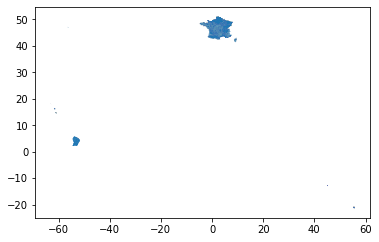

In [6]:
iris_fra = gpd.read_file(r"/Users/antoineclaverie-rospide/IRIS-GE_2-0_SHP_LAMB93_FXX-2021/IRIS_GE.shp")
iris_fra = iris_fra.to_crs(4326)
iris_glp = gpd.read_file(r"/Users/antoineclaverie-rospide/IRIS-GE_2-0_SHP_RGAF09UTM20_GLP-2021/IRIS_GE.shp")
iris_glp = iris_glp.to_crs(4326)
iris_guf = gpd.read_file(r"/Users/antoineclaverie-rospide/IRIS-GE_2-0_SHP_UTM22RGFG95_GUF-2021/IRIS_GE.shp")
iris_guf = iris_guf.to_crs(4326)
iris_mtq = gpd.read_file(r"/Users/antoineclaverie-rospide/IRIS-GE_2-0_SHP_RGAF09UTM20_MTQ-2021/IRIS_GE.shp")
iris_mtq = iris_mtq.to_crs(4326)
iris_myt = gpd.read_file(r"/Users/antoineclaverie-rospide/IRIS-GE_2-0_SHP_RGM04UTM38S_MYT-2021/IRIS_GE.shp")
iris_myt = iris_myt.to_crs(4326)
iris_reu = gpd.read_file(r"/Users/antoineclaverie-rospide/IRIS-GE_2-0_SHP_RGR92UTM40S_REU-2021/IRIS_GE.shp")
iris_reu = iris_reu.to_crs(4326)
iris_sba = gpd.read_file(r"/Users/antoineclaverie-rospide/IRIS-GE_2-0_SHP_RGAF09UTM20_SBA-2021/IRIS_GE.shp")
iris_sba = iris_sba.to_crs(4326)
iris_sma = gpd.read_file(r"/Users/antoineclaverie-rospide/IRIS-GE_2-0_SHP_RGAF09UTM20_SMA-2021/IRIS_GE.shp")
iris_sma = iris_sma.to_crs(4326)
iris_spm = gpd.read_file(r"/Users/antoineclaverie-rospide/IRIS-GE_2-0_SHP_RGSPM06U21_SPM-2021/IRIS_GE.shp")
iris_spm = iris_spm.to_crs(4326)

liste_iris = [iris_fra, iris_glp, iris_guf, iris_guf, iris_mtq, iris_myt, iris_reu, iris_sba, iris_sma, iris_spm]

iris = gpd.GeoDataFrame(pd.concat(liste_iris, ignore_index=True),crs=4326)

iris.head()
iris.plot()

#polygon_iris.describe()

import csv
iris_order = iris.sort_values(by=["CODE_IRIS"], ascending=True)

###iris_order['geometry'] = gpd.GeoSeries.from_wkt(iris_order['geometry'])
###iris_order = gpd.GeoDataFrame(iris_order, geometry='geometry')

iris_order = iris_order.rename(columns={'geometry': 'CONTOUR_IRIS', 'TYP_IRIS': 'TYPE_IRIS'})
iris_order.head()
iris_order.to_csv('contours_iris_full.csv', index = False, sep='|')



In [26]:
from shapely.geometry import Point, Polygon
from shapely import speedups
speedups.enabled


#data = pd.read_csv(r"/Users/antoineclaverie-rospide/Downloads/liste-coordonnees-gps-des-monuments.csv")
#print(data.head)
#data['geo'] = data.longitude.str.cat(data.latitude.str, sep=' ')
#iris_order = polygon_iris.sort_values(by=["CODE_IRIS"], ascending=True)
#iris_order = iris_order.rename(columns={'geometry': 'CONTOUR_IRIS', 'TYP_IRIS': 'TYPE_IRIS'})
#iris_order.head()

data = gpd.read_file(r"/Users/antoineclaverie-rospide/Downloads/liste-des-passages-a-niveau/liste-des-passages-a-niveau.shp")
data = data.to_crs(4326)
print(data.geometry)

Point_X = 1.8576953
Point_Y = 44.2012986

#44.2012986, 1.8576953
#46.141736	0.404965
#46.4351729231305	4.65821921825409
#44.7679	-0.3125
#43.7056788063795	4.66414824128151
#49.228611	0.721667
#48.6359715815921	-1.51141405105591
#43.4501102	6.3080895
#47.597702	-3.0633934
#48.873818	2.295023

point = Point(Point_X, Point_Y)
print(point)
point.geom_type
print(iris_order.geometry)
#if(iris_order.geometry.contains(point) == True):
    #print(iris_order.CODE_IRIS) 

pip_mask = data.within(iris_order.geometry)
print(pip_mask)

pip_data = iris_order.loc[pip_mask]
pip_data

0         POINT (2.80946 46.03149)
1         POINT (4.93832 46.87283)
2         POINT (5.26135 47.07408)
3         POINT (2.45936 48.62970)
4        POINT (-0.33196 46.89961)
                   ...            
17382     POINT (0.18850 49.48802)
17383     POINT (3.47705 48.20918)
17384     POINT (3.40593 48.17461)
17385     POINT (0.39250 49.75658)
17386     POINT (2.12007 50.04220)
Name: geometry, Length: 17387, dtype: geometry
POINT (1.8576953 44.2012986)
12906    POLYGON ((4.95841 46.15327, 4.95812 46.15316, ...
14248    POLYGON ((5.44470 46.01717, 5.44465 46.01656, ...
16417    POLYGON ((5.34718 45.97152, 5.34723 45.97138, ...
2774     POLYGON ((5.35283 45.95547, 5.35298 45.95531, ...
47402    POLYGON ((5.34718 45.97152, 5.34741 45.97164, ...
                               ...                        
49100    POLYGON ((45.12948 -12.79785, 45.12834 -12.795...
49018    POLYGON ((45.13869 -12.79662, 45.13840 -12.796...
49057    POLYGON ((45.12806 -12.80922, 45.12806 -12.809...
49111   

/opt/anaconda3/lib/python3.8/site-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


Empty GeoDataFrame
Columns: [INSEE_COM, NOM_COM, IRIS, CODE_IRIS, NOM_IRIS, TYP_IRIS, geometry]
Index: []

In [47]:
import csv
iris_order = polygon_iris.sort_values(by=["CODE_IRIS"], ascending=True)

###iris_order['geometry'] = gpd.GeoSeries.from_wkt(iris_order['geometry'])
###iris_order = gpd.GeoDataFrame(iris_order, geometry='geometry')

iris_order = iris_order.rename(columns={'geometry': 'CONTOUR_IRIS', 'TYP_IRIS': 'TYPE_IRIS'})
iris_order.head()
iris_order.to_csv('contours_iris.csv', index = False, sep='|')

In [11]:
import fiona

with fiona.open(r"/Users/antoineclaverie-rospide/CONTOURS-IRIS.shp") as reader:
        properties = reader.meta["schema"]["properties"]
        srid = reader.meta["crs"]["init"]
        # on vérifie que le nom des champs sont conformes

        data = [row["properties"] for row in reader]
        df = pd.DataFrame(data)

df.to_csv('test.csv', index = False)

In [38]:
merge_iris = code_iris.merge(polygon_iris, left_on='CODE_IRIS', right_on='CODE_IRIS')
merge_iris.head()
del merge_iris['TYP_IRIS_y']


In [43]:
print(merge_iris.geometry.dtypes)
polygon_iris.to_csv('contours_iris.csv', index = False)


geometry


In [27]:
from shapely.geometry import Point, Polygon

# Create Point objects
p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)

In [28]:
# Create a Polygon
coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coords)

In [29]:
# Let's check what we have
print(p1)
print(p2)
print(poly)


POINT (24.952242 60.1696017)
POINT (24.976567 60.16125)
POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


In [32]:
# Check if p1 is within the polygon using the within function
p1.within(poly)


True

In [33]:
# Check if p2 is within the polygon
p2.within(poly)

False

In [34]:
# Our point
print(p1)

# The centroid
print(poly.centroid)

POINT (24.952242 60.1696017)
POINT (24.95224242849236 60.16960179038188)


In [35]:
# Does polygon contain p1?
poly.contains(p1)

True

In [39]:

# Import necessary modules
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Filepath
fp = r"/Users/antoineclaverie-rospide/Downloads/bano-01.csv"

# Read the data
data = pd.read_csv(fp, sep=',', header=True)
len(data)

#data['adresse']= data['adresse']
data.head()

# Import the geocoding tool
from geopandas.tools import geocode

# Geocode addresses using Nominatim. Remember to provide a custom "application name" in the user_agent parameter!
geo = geocode(data['addr'], provider='nominatim', user_agent='autogis_xx', timeout=4)

TypeError: Passing a bool to header is invalid. Use header=None for no header or header=int or list-like of ints to specify the row(s) making up the column names